In [38]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:/Users/TRC/Downloads/kroger_members.csv")
df

,kroger_id,has_member_card
0,1,Y
1,2,Y
2,3,NaN
3,4,Y
4,5,NaN
...,...,...
95,96,Y
96,97,NaN
97,98,Y
98,99,NaN


In [ ]:
df.head(10)


2

In [ ]:
df.shape

In [ ]:
df.columns.tolist()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated()

In [11]:

y_mem=(df['has_member_card']=='Y').value_counts()
y_mem


has_member_card
True     63
False    37
Name: count, dtype: int64

In [ ]:
df['has_member_card'] = df['has_member_card'].fillna('N')
df

In [6]:
#Ensure all kroger_id values are integers and unique.
ui=df['kroger_id'].is_unique
ui
inte= df['kroger_id'].apply(lambda x: isinstance(x, int) or (str(x).isdigit()))
inte

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96    True
97    True
98    True
99    True
Name: kroger_id, Length: 100, dtype: bool

In [7]:
#Check for any negative or invalid IDs.
#Reset DataFrame index after cleaning.
df = df[df['kroger_id'].apply(lambda x: str(x).isdigit() & int(x) >= 0)]

df = df.reset_index(drop=True)
df

,kroger_id,has_member_card
0,1,Y
1,2,Y
2,3,NaN
3,4,Y
4,5,NaN
...,...,...
95,96,Y
96,97,NaN
97,98,Y
98,99,NaN


In [8]:
#Count total number of customers.
len(df)

100

In [12]:
#Count total members vs non-members.
y_mem

has_member_card
True     63
False    37
Name: count, dtype: int64

In [13]:
#Find the percentage of customers who have a membership card.
y=(df['has_member_card']== 'Y').mean()* 100
print(y,"%")

63.0 %


In [40]:
#Plot a pie chart of members vs non-members.
import matplotlib as plt
c=df['has_member_card'].value_counts()
l=('member','non-member')
plt.pie(c, labels=l, autopct='%1.1f%%')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'pie'

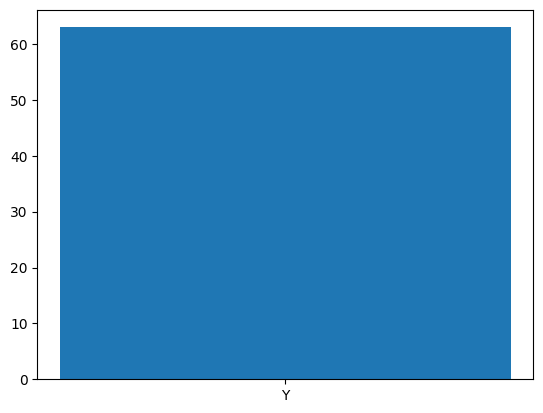

In [15]:
#Plot a bar chart showing the same distribution.
i=c.index
plt.bar(i,c)
plt.show()

In [16]:
#Calculate the mean, median, and mode of membership status (where 'Y'=1 and 'N'=0).
df['member'] = df['has_member_card'].map({'Y': 1, 'N': 0})
df
print(df['member'].mean())
print(df['member'].mode()[0])            #gives me the first mode
print(df['member'].median())


1.0
1.0
1.0


In [17]:
#Probability that a random customer has a membership card.
a=(df['has_member_card'] == 'Y').sum()
member = (a / len(df))
member

np.float64(0.63)

In [18]:
#Probability that a random customer does not have a membership card.
b=(df['has_member_card'] == 'N').sum()
non_member =(b/ len(df))
non_member

np.float64(0.0)

In [19]:
#Convert membership status into a binary NumPy array (1 for 'Y', 0 for 'N').
binary = np.where(df['has_member_card'] == 'Y', 1, 0)
binary


NameError: name 'np' is not defined

In [22]:
#Create a random “spend score” array of the same size.
spend_score=np.random.randint(1,100,size=len(df))
spend_score

NameError: name 'np' is not defined

In [23]:
#Perform vector addition of membership_binary and spend_score
addition=binary+spend_score
addition


NameError: name 'binary' is not defined

In [24]:
#Compute the dot product of these arrays.
dot_pro=np.dot(binary,spend_score)
dot_pro


NameError: name 'np' is not defined

In [25]:
#Perform matrix multiplication:
#Features = [membership_binary, spend_score]
#Weights = [0.5, 0.5]

w=np.array([0.5,0.5])
f=np.column_stack((binary,spend_score))
m=np.dot(f,w)
m

NameError: name 'np' is not defined

In [26]:
#Create Is_Member column (1 if 'Y', else 0).
df = df.rename(columns={'member': 'Is_member'})
df

,kroger_id,has_member_card,Is_member
0,1,Y,1.0
1,2,Y,1.0
2,3,NaN,NaN
3,4,Y,1.0
4,5,NaN,NaN
...,...,...,...
95,96,Y,1.0
96,97,NaN,NaN
97,98,Y,1.0
98,99,NaN,NaN


In [27]:
#Create a simulated Monthly_Spend column (random values between $50–$500).
df['monthly_spend']=np.random.randint(50,500,size=len(df))
df


NameError: name 'np' is not defined

In [28]:
#Create a Discount_Eligible column (1 if Is_Member=1 and Monthly_Spend>200).
df['Discount_eligible']=((df['Is_member']==1) & (df['monthly_spend']>200))
df

KeyError: 'monthly_spend'

In [29]:

df['spend_quartile'] = pd.qcut(df['monthly_spend'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df

KeyError: 'monthly_spend'

In [30]:
#Select all customers who are members and spend more than $300 per month.
x=df[(df['Is_member']==1) & (df['monthly_spend']>300)]
x


KeyError: 'monthly_spend'

In [31]:
#Get the top 10 highest spenders among members.
x.head(10)

NameError: name 'x' is not defined

In [32]:
#Sort customers by Monthly_Spend descending and then by kroger_id ascending.
d=df.sort_values(by='monthly_spend',ascending=False)
d


KeyError: 'monthly_spend'

In [33]:
e=df.sort_values(by='kroger_id',ascending=True)
e

,kroger_id,has_member_card,Is_member
0,1,Y,1.0
1,2,Y,1.0
2,3,NaN,NaN
3,4,Y,1.0
4,5,NaN,NaN
...,...,...,...
95,96,Y,1.0
96,97,NaN,NaN
97,98,Y,1.0
98,99,NaN,NaN


In [34]:
#Count number of customers in each Discount_Eligible group.
print(df['monthly_spend'].max())
f=df[(df['Is_member']==1) & (df['monthly_spend']>400)]
print("Members above 400:",len(f))
g=df[(df['Is_member']==1) & (df['monthly_spend']>300)]
print("Members above 300:",len(g))
h=df[(df['Is_member']==1) & (df['monthly_spend']>200)]
print("Members above 200:",len(h))
j=df[(df['Is_member']==1) & (df['monthly_spend']>100)]
print("Members above 100:",len(j))


KeyError: 'monthly_spend'

In [35]:
#What percentage of customers are members?
print(y,'%')

63.0 %


In [36]:
#Do members have a higher average monthly spend than non-members?
mem_avg=df[df['Is_member']==1]['monthly_spend'].mean()
print(mem_avg.round(3))

non_avg=df[df['Is_member']==0]['monthly_spend'].mean()
print(non_avg.round(3))

if(mem_avg<non_avg):
    print('Yes')
else:
    print('No')

KeyError: 'monthly_spend'

In [37]:
#Are high spenders always members?
l=['Members','Non-members']
value=[mem_avg,non_avg]
plt.barh(l,value)
plt.xlabel('Average spend')
plt.ylabel('Categories')
plt.show()


NameError: name 'mem_avg' is not defined